In [42]:
import torch
import matplotlib.pyplot as plt

data = torch.load('../cache/layer20.pt', map_location='cpu', weights_only=True)

In [43]:
# 看看字典里都存了什么
# print(f"字典的键 (Keys): {data.keys()}")

# 尝试寻找包含 'attn' 或 'score' 字眼的键，并查看其维度
# for key in data.keys():
#     if isinstance(data[key], torch.Tensor):
#         print(f"发现张量键 '{key}', 维度为: {data[key].shape}")
#     else:
#         print(f"键 '{key}' 的内容类型为: {type(data[key])}")
print('=' * 30 + " keys list " + '=' * 30)
print('\n'.join(data.keys()))
print('=' * 28 + " keys content " + '=' * 28)
for key in data.keys():
    if isinstance(data[key], torch.Tensor):
        print(f"Tensor '{key}', dim: {data[key].shape}")
    else:
        print(f"key: '{key}' content type: {type(data[key])}")

============================== keys list ==============================
layer_index
full_frame_attention
last_block_frame_attention
is_logits
prompt
num_frames
frame_seq_length
num_frame_per_block
num_heads
block_sizes
query_frames
key_frames
last_block_query_frames
============================ keys content ============================
key: 'layer_index' content type: <class 'int'>
Tensor 'full_frame_attention', dim: torch.Size([12, 21, 21])
Tensor 'last_block_frame_attention', dim: torch.Size([12, 21])
key: 'is_logits' content type: <class 'bool'>
key: 'prompt' content type: <class 'str'>
key: 'num_frames' content type: <class 'int'>
key: 'frame_seq_length' content type: <class 'int'>
key: 'num_frame_per_block' content type: <class 'int'>
key: 'num_heads' content type: <class 'int'>
key: 'block_sizes' content type: <class 'list'>
key: 'query_frames' content type: <class 'list'>
key: 'key_frames' content type: <class 'list'>
key: 'last_block_query_frames' content type: <class 'list'>


In [85]:
def plt_fig(magnitude):
    plt.figure(figsize=(10, 4), dpi=300)
    plt.stem(magnitude[-1].numpy()) # 使用 stem 图看离散频率点
    plt.title("Frequency Spectrum (Last Query Row)")
    plt.xlabel("Frequency Bin Index (k)")
    plt.ylabel("Amplitude")
    plt.grid(True, alpha=0.3)
    plt.show()

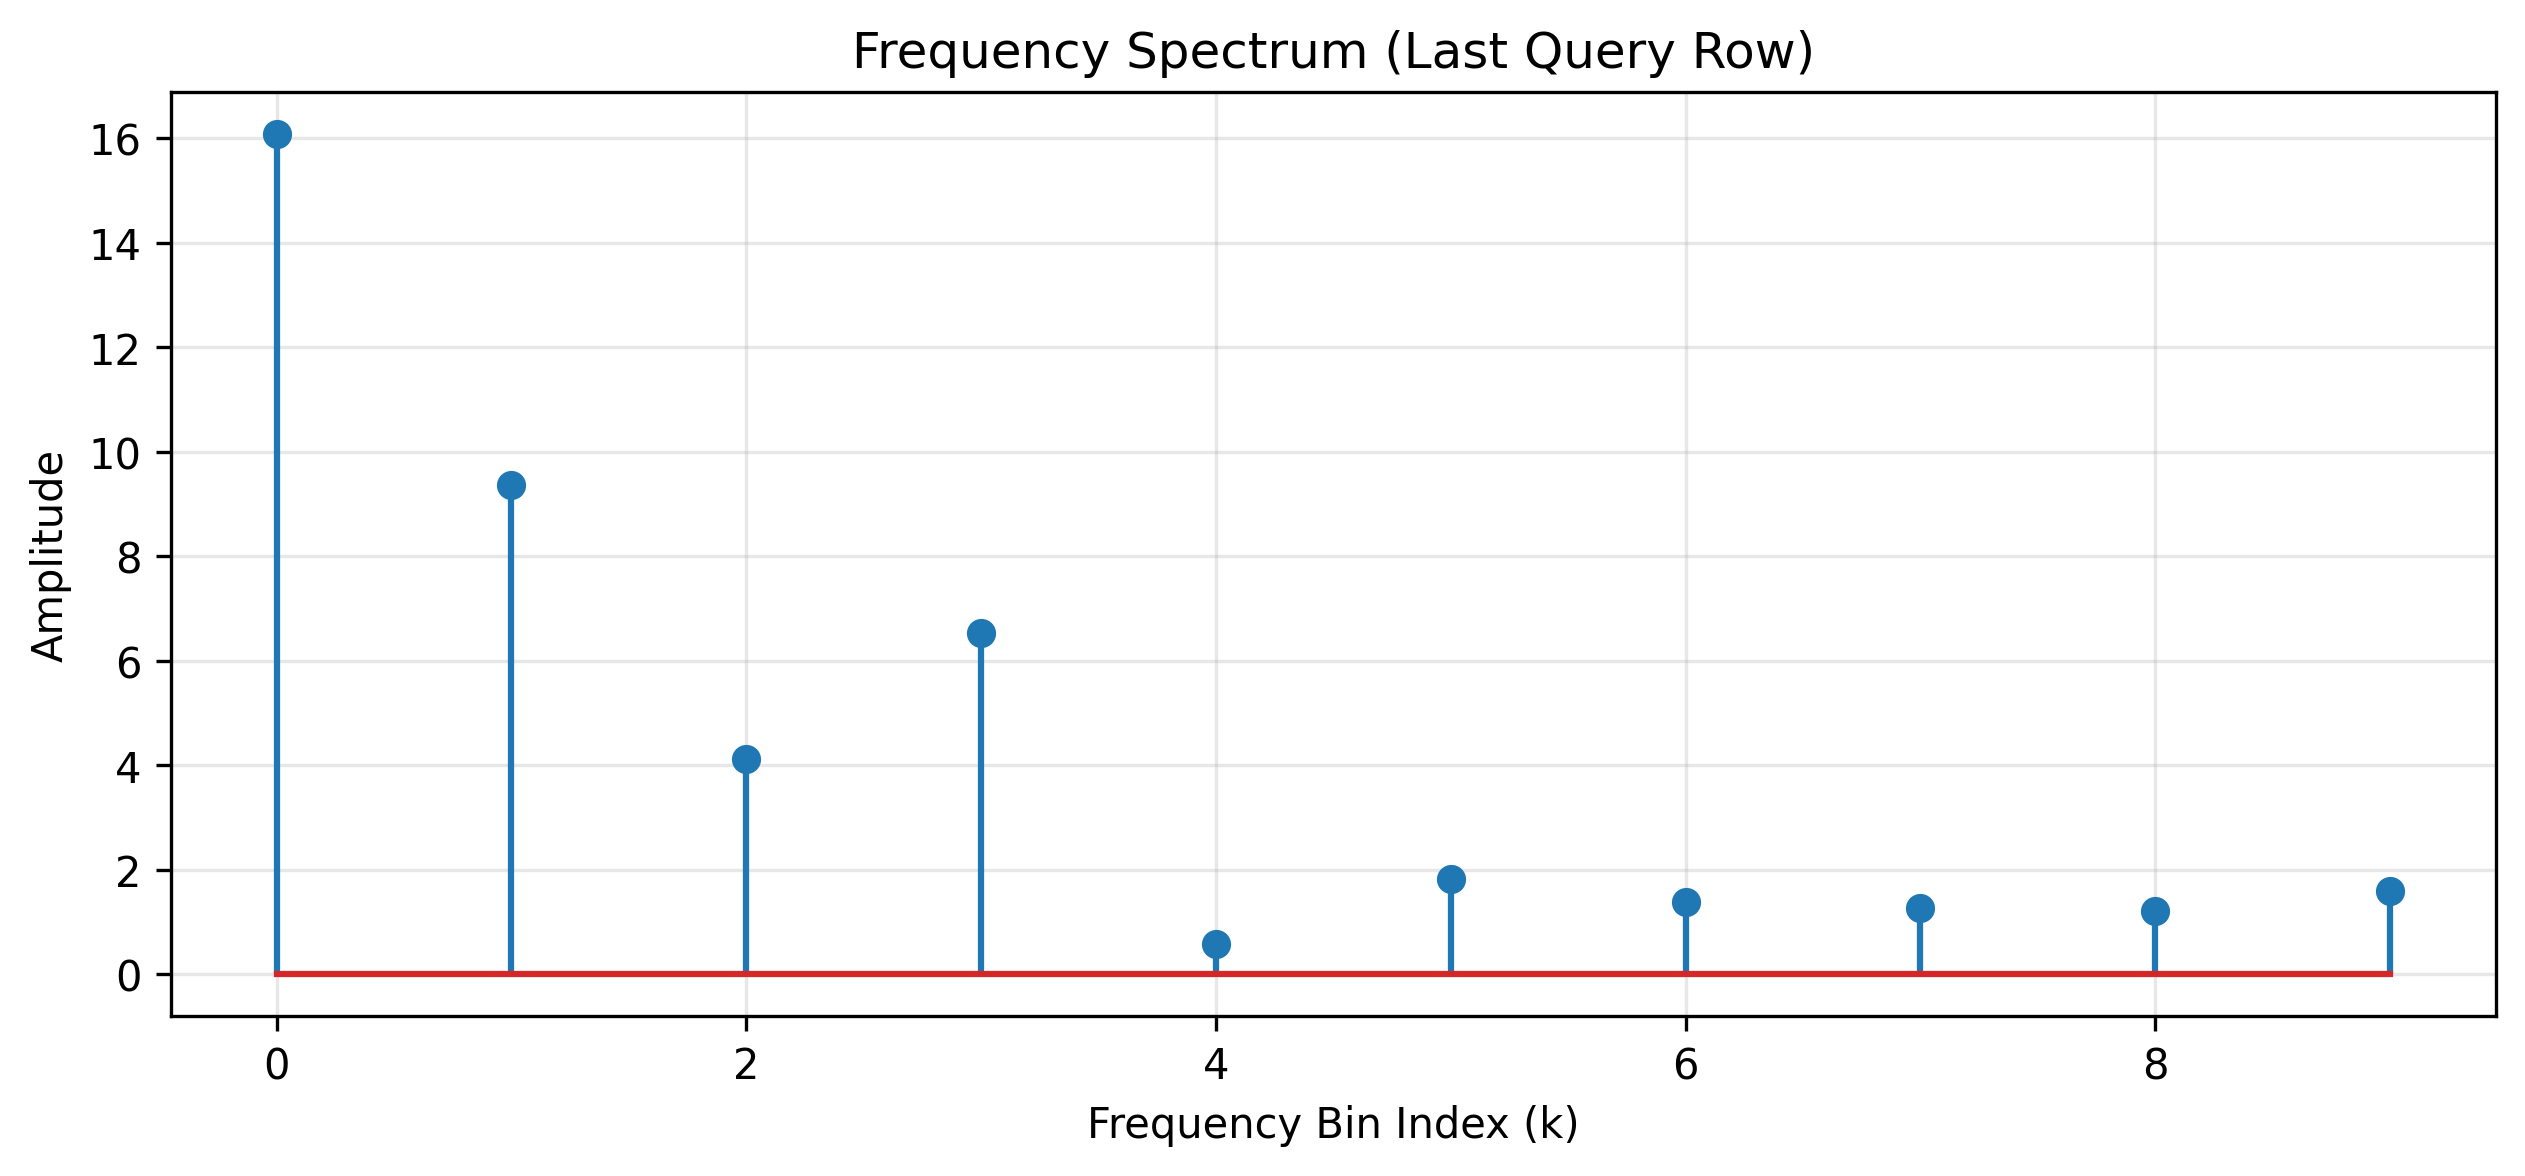

In [90]:
attn_data = data['full_frame_attention'][8][:, :-3].to(dtype=torch.float32)
# attn_data = data['full_frame_attention'][8].to(dtype=torch.float32)
spectrum = torch.fft.rfft(attn_data, dim=-1)
magnitude = torch.abs(spectrum) # 计算幅值（能量）
plt_fig(magnitude) # 可视化最后一行